## xG value

In [153]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
from statsbombpy import sb
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings 

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [154]:
#load data - store it in train dataframe
train_overall = pd.DataFrame()
train_overall = sb.matches(competition_id=9, season_id=281)

In [155]:
train_overall

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,...,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,...,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,...,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,...,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,...,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2
5,3895286,2024-03-30,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Hoffenheim,2,1,available,...,2024-05-08T03:36:21.320065,27,Regular Season,BayArena,Deniz Aytekin,Xabier Alonso Olano,Pellegrino Matarazzo,1.1.0,2,2
6,3895220,2024-02-03,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Darmstadt 98,Bayer Leverkusen,0,2,available,...,2024-05-08T01:01:15.978489,20,Regular Season,Merck-Stadion am Böllenfalltor,Tobias Reichel,Torsten Lieberknecht,Xabier Alonso Olano,1.1.0,2,2
7,3895250,2024-02-23,21:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,FSV Mainz 05,2,1,available,...,2024-05-08T00:38:33.864825,23,Regular Season,BayArena,Timo Gerach,Xabier Alonso Olano,Bo Henriksen,1.1.0,2,2
8,3895266,2024-03-10,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Wolfsburg,2,0,available,...,2024-04-28T10:29:53.455142,25,Regular Season,BayArena,Daniel Siebert,Xabier Alonso Olano,Niko Kovač,1.1.0,2,2
9,3895275,2024-03-17,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Freiburg,Bayer Leverkusen,2,3,available,...,2024-04-19T22:39:18.935666,26,Regular Season,Europa-Park Stadion,Harm Osmers,Christian Streich,Xabier Alonso Olano,1.1.0,2,2


In [156]:
#i need all matches events data in a df
train = pd.DataFrame()
for match_id_value in train_overall['match_id']:
    events_data = sb.events(match_id=match_id_value)  
    train = pd.concat([train, events_data])

In [157]:
shots_overall = train.loc[train['type'] == 'Shot']
shots = shots_overall.loc[shots_overall['team_id'] == 904]

In [158]:
def eliminar_columnas_nan(df):
    return df.dropna(axis=1, how='all')

In [159]:
# Extract coordinates with correct scaling
shots["X"] = shots['location'].apply(lambda cell: cell[0])
shots["Y"] = shots['location'].apply(lambda cell: cell[1])

# Define successful and unsuccessful outcomes
successful_outcomes = ['Goal']
unsuccessful_outcomes = ['Blocked', 'Off T', 'Post', 'Saved', 'Wayward', 'Saved Off T', 'Saved To Post']

# Classify each shot as successful or not successful
shots['Goal'] = shots['shot_outcome'].apply(lambda x: 1 if x in successful_outcomes else 0)

In [160]:
clean_shots = eliminar_columnas_nan(shots)

In [161]:
clean_shots.drop('location', axis = 1, inplace = True)

In [162]:
clean_shots.drop('shot_outcome', axis = 1, inplace = True)

In [163]:
clean_shots.drop('team_id', axis = 1, inplace = True)

In [164]:
clean_shots.drop('match_id', axis = 1, inplace = True)

In [165]:
#under_pressure -> true = 1
#shot_statsbomb_xg
#team
#shot_end_location
#related_events

clean_shots.drop('related_events', axis = 1, inplace = True)

In [166]:
clean_shots.drop('player', axis = 1, inplace = True)

In [167]:
clean_shots["goal_x"] = clean_shots['shot_end_location'].apply(lambda cell: cell[0])
clean_shots["goal_y"] = clean_shots['shot_end_location'].apply(lambda cell: cell[1])
clean_shots["goal_z"] = clean_shots['shot_end_location'].apply(lambda cell: cell[2] if len(cell) > 2 else 0)

In [168]:
clean_shots['distance_2d'] = np.sqrt((clean_shots['goal_x'] - clean_shots['X'])**2 + (clean_shots['goal_y'] - clean_shots['Y'])**2)

# Calculate 3D distance
clean_shots['distance_3d'] = np.sqrt((clean_shots['goal_x'] - clean_shots['X'])**2 + (clean_shots['goal_y'] - clean_shots['Y'])**2 + clean_shots['goal_z']**2)

# Calculate angle
clean_shots['shot_angle'] = np.arctan(clean_shots['goal_z'] / clean_shots['distance_2d'])

# Convert angle to degrees (if needed)
clean_shots['shot_angle_degrees'] = np.degrees(clean_shots['shot_angle'])

In [172]:
def calculate_theta(row):
    z = row['goal_z']
    x = row['X']
    
    # Calculate sin(theta)
    sin_theta = z / (z**2 + (120 - x)**2)
    
    # Ensure the value is in the valid range for arcsin [-1, 1]
    if -1 <= sin_theta <= 1:
        # Calculate theta in radians
        theta_rad = np.arcsin(sin_theta)
        # Optionally convert to degrees
        theta_deg = np.degrees(theta_rad)
        return theta_deg
    else:
        return np.nan  # Return NaN if sin(theta) is out of range

# Apply the function to each row in the DataFrame
clean_shots['angle'] = clean_shots.apply(calculate_theta, axis=1)
clean_shots['shot_angle_degrees'] = np.degrees(clean_shots['angle'])

In [173]:
clean_shots

,duration,id,index,minute,off_camera,out,period,play_pattern,player_id,position,...,Y,Goal,goal_x,goal_y,goal_z,distance_2d,distance_3d,shot_angle,shot_angle_degrees,angle
4094,0.217872,bbc2c68d-c096-483d-abf4-32c0175a0f55,480,7,NaN,NaN,1,Regular Play,38004.0,Left Wing Back,...,33.5,0,118.1,35.7,0.2,4.134005,4.138840,0.048342,22.485151,0.392440
4096,0.085298,b2c3d59d-3bef-4f8a-ad86-26b69940c64e,684,13,NaN,NaN,1,From Corner,8221.0,Center Back,...,47.4,0,114.1,46.8,0.0,0.632456,0.632456,0.000000,0.000000,0.000000
4097,0.402989,bb53b537-1685-4019-9e8f-98f3805828eb,848,16,NaN,NaN,1,Regular Play,3500.0,Right Defensive Midfield,...,42.5,0,101.4,41.3,0.0,12.258874,12.258874,0.000000,0.000000,0.000000
4098,1.732516,0247fb51-7bf7-4be6-82d7-bf63892bdd53,854,16,NaN,NaN,1,From Corner,8221.0,Center Back,...,32.6,0,116.4,38.1,0.0,8.287943,8.287943,0.000000,0.000000,0.000000
4100,0.479048,cf7357c9-3bd6-425f-ac34-ef7f11897394,1193,24,NaN,NaN,1,Other,32289.0,Center Forward,...,40.0,1,120.0,42.9,1.0,12.345445,12.385879,0.080825,22.640223,0.395146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,0.287836,5df16513-d372-4a46-9661-09c10341a40b,2051,47,NaN,NaN,2,Regular Play,40724.0,Left Wing,...,35.0,0,118.0,36.6,1.3,7.570997,7.681797,0.170050,47.393631,0.827175
3523,1.221804,c8521aea-0248-4c7c-9036-c103ff5e2416,2357,56,NaN,NaN,2,From Counter,32289.0,Center Forward,...,43.9,0,120.0,45.0,6.3,26.123170,26.872104,0.236646,28.689060,0.500719
3524,1.234672,f8cd5da5-6a20-41ad-8794-4397b76a11cf,2661,63,NaN,NaN,2,From Throw In,40724.0,Left Wing,...,45.4,1,120.0,38.2,2.0,16.819037,16.937532,0.118357,27.934360,0.487547
3531,0.878213,bcea08d2-3377-4014-a452-aec0bed0d80e,3422,86,NaN,NaN,2,Regular Play,32289.0,Left Center Forward,...,31.6,0,120.0,34.9,0.9,21.652944,21.671640,0.041541,6.440106,0.112401


In [174]:
goals = clean_shots.loc[clean_shots['Goal']==1]

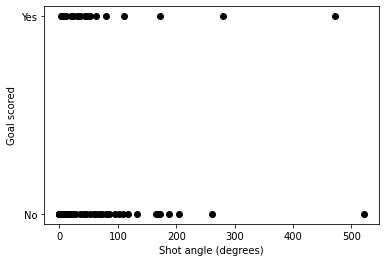

In [176]:
#first 200 shots
shots_200=clean_shots.iloc[:200]
#plot first 200 shots goal angle
fig, ax = plt.subplots()
ax.plot(shots_200['shot_angle_degrees'], shots_200['Goal'], linestyle='none', marker= '.', markersize= 12, color='black')
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

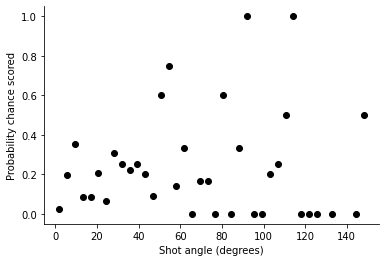

In [177]:
#number of shots from angle
shotcount_dist = np.histogram(clean_shots['shot_angle_degrees'], bins=40, range=[0, 150])
#number of goals from angle
goalcount_dist = np.histogram(goals['shot_angle_degrees'], bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
#probability of scoring goal
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2
#make plot
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

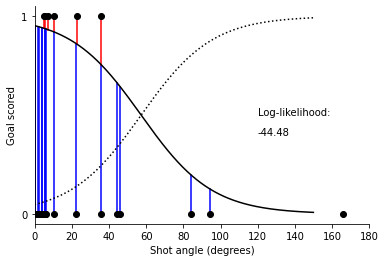

In [180]:
b = [3, -3]
x = np.arange(150,step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x*np.pi/180))
#calculate xG
xG = 1/(1+np.exp(b[0]+b[1]*clean_shots['angle']))
shots = clean_shots.assign(xG = xG)
shots_40 = shots.iloc[:40]
fig, ax = plt.subplots()
#plot data
ax.plot(shots_40['shot_angle_degrees'], shots_40['Goal'], linestyle='none', marker= '.', markersize= 12, color='black', zorder = 3)
#plot curves
ax.plot(x, y, linestyle=':', color='black', zorder = 2)
ax.plot(x, 1-y, linestyle='solid', color='black', zorder = 2)
#calculate loglikelihood
loglikelihood=0
for item,shot in shots_40.iterrows():
    ang = shot['shot_angle_degrees']
    if shot['Goal'] == 1:
        loglikelihood = loglikelihood + np.log(shot['xG'])
        ax.plot([ang,ang],[shot['Goal'],1-shot['xG']], color='red', zorder = 1)
    else:
        loglikelihood = loglikelihood + np.log(1 - shot['xG'])
        ax.plot([ang,ang], [shot['Goal'], 1-shot['xG']], color='blue', zorder = 1)
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
plt.xlim((0,180))
plt.text(120,0.5,'Log-likelihood:')
plt.text(120,0.4,str(loglikelihood)[:6])
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Goal   No. Observations:                  623
Model:                            GLM   Df Residuals:                      621
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -244.55
Date:                Fri, 09 Aug 2024   Deviance:                       489.09
Time:                        21:07:53   Pearson chi2:                     613.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01757
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9736      0.128    -15.377      0.0

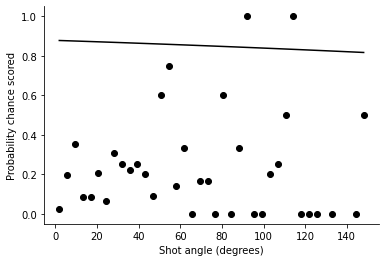

In [182]:
#create model
test_model = smf.glm(formula="Goal ~ angle" , data=clean_shots,
                           family=sm.families.Binomial()).fit()
print(test_model.summary())
#get params
b=test_model.params
#calculate xG
xGprob = 1/(1+np.exp(b[0]+b[1]*midangle*np.pi/180))
fig, ax = plt.subplots()
#plot data
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
#plot line
ax.plot(midangle, xGprob, linestyle='solid', color='black')
#make legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()